In [1]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
m = torch.randint(50, 150, (1,), device=device).item()
trueWeight, trueBias, spread = torch.rand(1, device=device) * 4.5 + 0.5, torch.randint(-3, 3, (1,), device=device), torch.rand(1, device=device) * 0.05
X = torch.rand(m, 1, device=device) * 10 - 5
Y = torch.round(torch.clamp(torch.sigmoid(trueWeight * X + trueBias) + torch.randn(m, 1, device=device) * spread, 0, 1))

Using device: cuda


In [2]:
weight = torch.randn(1, 1, requires_grad=True, device=device)
bias = torch.randn(1, requires_grad=True, device=device)
eta, epoch = 0.01, 10000
criterion = torch.nn.BCEWithLogitsLoss()

for e in range(epoch):
    loss = criterion(X @ weight + bias, Y)
    loss.backward()
    with torch.no_grad():
        weight -= eta * weight.grad
        bias -= eta * bias.grad
    weight.grad.zero_()
    bias.grad.zero_()

print(f'Trained weight: {weight.flatten()[0]}\nTrained bias: {bias[0]}')

Trained weight: 3.1088907718658447
Trained bias: -2.2114388942718506


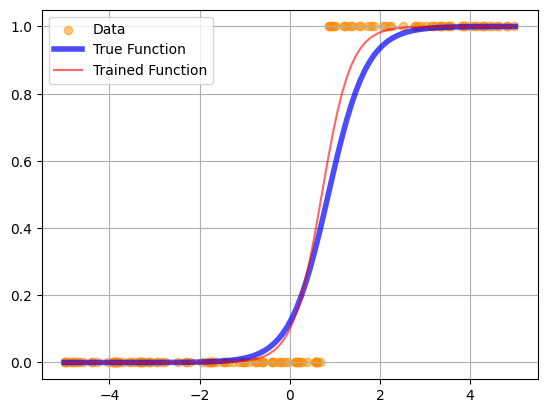

True loss: 0.07621216028928757 Trained loss: 0.05970854312181473


In [3]:
import matplotlib.pyplot as plt

plt.scatter(X.cpu(), Y.cpu(), color='darkorange', alpha=0.5, label='Data')

trainedFuncX = trueFuncX = torch.linspace(-5, 5, 100, device=device)
trueFuncY = torch.sigmoid(trueWeight * trueFuncX + trueBias)
trainedFuncY = torch.sigmoid(weight.flatten() * trainedFuncX + bias)

plt.plot(trueFuncX.cpu(), trueFuncY.cpu(), color='blue', linewidth=4, alpha=0.7, label='True Function')
plt.plot(trainedFuncX.cpu().detach(), trainedFuncY.cpu().detach(), color='red', alpha=0.6, label='Trained Function')

plt.grid()
plt.legend()
plt.show()

print(
    "True loss:", criterion(trueWeight * X + trueBias, Y).item(),
    "Trained loss:", criterion(weight * X + bias, Y).item()
)